In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

## K-Means Clustering
In this technique in scattter plot of of data points , k random points are chosen at any random location , say k=2. Then from these points nearest points are assigned their group , then the two points are kept at centroid of assigned points , then again nearest points are reclassified into their group , this process is repeated again and again till the time there is no more shift in position of these 2 points

In [5]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


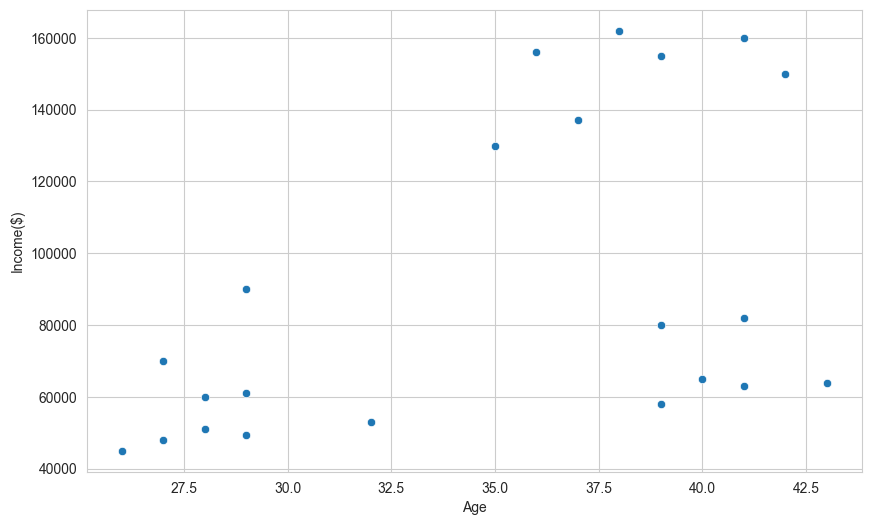

In [6]:
plt.figure(figsize=(10,6))

sns.scatterplot(x="Age",y="Income($)",data=df)

plt.show()

In [9]:
km  = KMeans(n_clusters=3,n_init=100)
y_pred = km.fit_predict(df[["Age","Income($)"]])

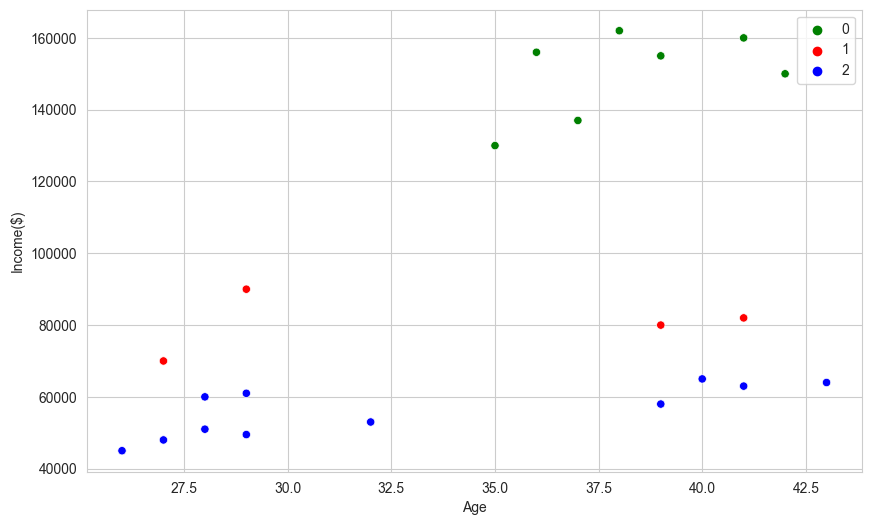

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="Income($)",hue=y_pred,palette=["green","red","blue"],data=df)
plt.show()

In [22]:
# here the green cluster looks good but blue and red clusters are sort of missclassified
# this problem is due to the fact that data is not scaled properly  income is in thousands while age changes in unit parameter

scaler = MinMaxScaler()

df["Income($)"] = scaler.fit_transform(df["Income($)"].values.reshape(-1,1))
df["Age"] = scaler.fit_transform(df["Age"].values.reshape(-1,1))
km  = KMeans(n_clusters=3,n_init=100)
y_pred = km.fit_predict(df[["Age","Income($)"]])

In [25]:
km.cluster_centers_ # these are the centeroids of the clusters

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

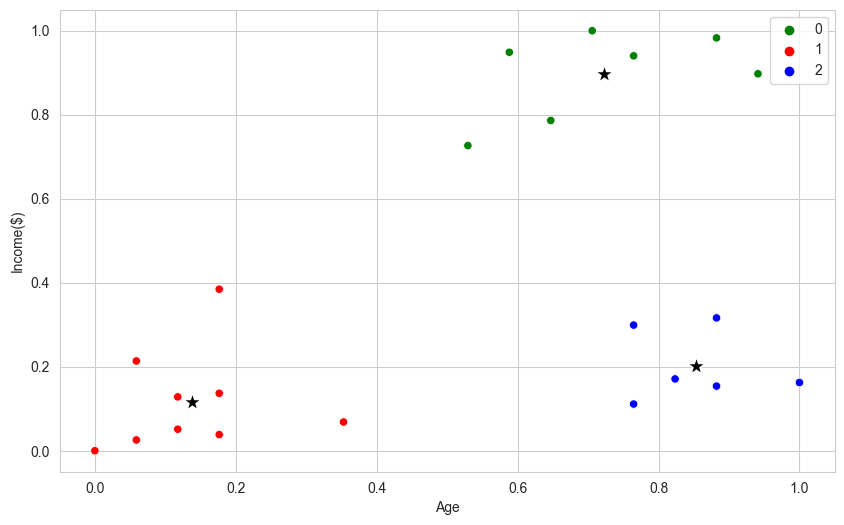

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Income($)", hue=y_pred, palette=["green", "red", "blue"], data=df)
sns.scatterplot(x=km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], marker="*", color="black", s=200)
plt.show()

## Elbow Technique
This is used to find the optimal value of k for k means clustering, we do trial and error for k=1, k=2, k=3 ..
and calculate SSE i.e sum of squared errors , i.e distance of each point to centroid of cluster then squaring them and summing them all over this is done for k groups,

SSE<sup>k</sup>= SSE<sub>1</sub> + .....SSE<sub>k</sub>

then when the elbow point is achieved that is SSE is no further decreasing much choose this k

In [38]:
sse = []
k_rang = range(1,10)
for k in k_rang:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [39]:
sse

[5.434011511988177,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2664030124668415,
 0.22395807059250117,
 0.17473586079225922,
 0.13937852495507835,
 0.11490780678851835]

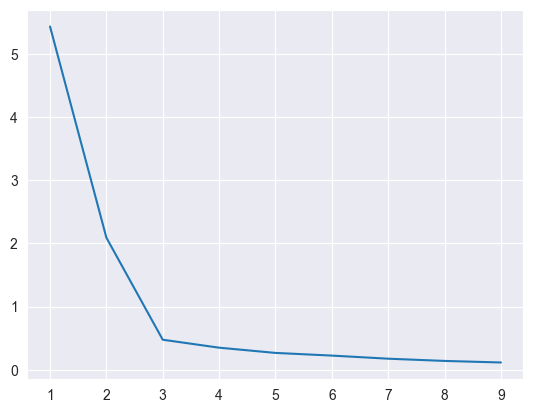

In [41]:
sns.set_style(style="darkgrid")
sns.lineplot(x=k_rang,y=sse)
plt.show()